
# Lab 11: Understanding the data. 

Last 2 classes we have been working on understanding data. In this lab you will apply that.


**Context**
The goal of this lab is to understand a large dataset of 27901 rows and 18 columns Perform Exploratory Data Analysis (EDA) on the data. Look at how the data effects the end result **depression** (yes/no)
## Part 1
- Load and get a basic understanding of the dataset
- Clean up the data 
    - examples:
        - check and fix any missing data 
        - use both Hot and integer encoding
        - convert any numeric data from strings to ints
- Perform Exploratory Data Analysis (EDA) 
    - I will leave it to you to understand and explore this. 
        - Histplot
        - Countplot
        - Correlation
        - Heatmaps
        - boxplots
        - have fun

Make sure to communicate to me along the way. I want your to tell me what your assumptions are what your learning about the data and what you learned with EDA.  There are 18 data points for each student I expect an perform EDA on most of those points like what we did in class with MPG. 

##### ***Remember*** how we did a `sns.pairplot(df[[ "cylinders", "mpg","model_year"]])` and `sns.pairplot(df[["mpg", "horsepower", "weight", "displacement"]])` 


## Part 2: 
Model the data using what we learned in `Linear_Regression_Part2.ipynb` predict if a student will or will not have `Depression` 

- Perform linear Regression on the model using `DecisionTreeRegressor`
- Have at least 5 different models and how dropping a column effects the data predictor 
- Once you find a model with a good prediction play with the size of your test and training data to understand how it affects your model
    - compare the `R²` score  and the `MAE` to show improvement or degradation of the model.

**Remember to have fun with this**

----------------------------------------------------------------------------------------------------------------------------------------------

From: https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset/data


Field Descriptions

**id** - A unique identifier assigned to each student record in the dataset.

**Gender** - The gender of the student (e.g., Male, Female, Other). This helps in analyzing gender-specific trends in mental health.

**Age** - The age of the student in years.

**City** - The city or region where the student resides, providing geographical context for the analysis.

**Profession** - The field of work or study of the student, which may offer insights into occupational or academic stress factors.

**Academic Pressure** - A measure indicating the level of pressure the student faces in academic settings. This could include stress from exams, assignments, and overall academic expectations.

**Work Pressure** - A measure of the pressure related to work or job responsibilities, relevant for students who are employed alongside their studies.

**CGPA** - The cumulative grade point average of the student, reflecting overall academic performance.

**Study Satisfaction** - An indicator of how satisfied the student is with their studies, which can correlate with mental well-being.

**Job Satisfaction** - A measure of the student’s satisfaction with their job or work environment, if applicable.

**Sleep Duration** - The average number of hours the student sleeps per day, which is an important factor in mental health.

**Dietary Habits** - An assessment of the student’s eating patterns and nutritional habits, potentially impacting overall health and mood.

**Degree** - The academic degree or program that the student is pursuing.

**Have you ever had suicidal thoughts ?** - A binary indicator (Yes/No) that reflects whether the student has ever experienced suicidal ideation.

**Work/Study Hours** - The average number of hours per day the student dedicates to work or study, which can influence stress levels.

**Financial Stress** - A measure of the stress experienced due to financial concerns, which may affect mental health.

**Family History of Mental Illness** - Indicates whether there is a family history of mental illness (Yes/No), which can be a significant factor in mental health predispositions.

**Depression** - The target variable that indicates whether the student is experiencing depression (Yes/No).

------------------------------------------------------------------------------------------------------------------------------------------------

*Provided for reference only*
``` python 
import kagglehub
import shutil

# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

#move the dowload to the current directory
shutil.move(path, "./Lab_11_dataset")
````

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# loading the dataset
df = pd.read_csv("./Lab_11_dataset/student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

Start of my work below

PART 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# loading the dataset
SurveyData_df = pd.read_csv("student_depression_dataset.csv")
SurveyData_df.head()
SurveyData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

First, lets check for any catergories returning errors to be fixed before we think about employing integer or hot encoding-> the section above will help in looking through the categories by easily giving their names (Based off the Encoding Techniques part of the notes)->Options that are already numerical need not be included (int and float)

In [2]:
#commented out int and float options after realizing they were not needed to be looked at here
print(f"Gender Options:{SurveyData_df["Gender"].unique()}")
#print(f"Age Options:{SurveyData_df["Age"].unique()}")
print(f"City Options:{SurveyData_df["City"].unique()}")
print(f"Profession Options:{SurveyData_df["Profession"].unique()}")
#print(f"Academic Pressure Options:{SurveyData_df["Academic Pressure"].unique()}")
#print(f"Work Pressure Options:{SurveyData_df["Work Pressure"].unique()}")
#print(f"CGPA Options:{SurveyData_df["CGPA"].unique()}")
#print(f"Study Satisfaction Options:{SurveyData_df["Study Satisfaction"].unique()}")
#print(f"Job Satisfaction Options:{SurveyData_df["Job Satisfaction"].unique()}")
print(f"Sleep Duration Options:{SurveyData_df["Sleep Duration"].unique()}")
print(f"Dietary Habits Options:{SurveyData_df["Dietary Habits"].unique()}")
print(f"Degree Options:{SurveyData_df["Degree"].unique()}")
print(f"'Have you ever had suicidal thoughts ?'' Options:{SurveyData_df["Have you ever had suicidal thoughts ?"].unique()}")
#print(f"Work/Study Hours Options:{SurveyData_df["Work/Study Hours"].unique()}")
print(f"Financial Stress Options:{SurveyData_df["Financial Stress"].unique()}")
print(f"Family History of Mental Illness Options:{SurveyData_df["Family History of Mental Illness"].unique()}")
#print(f"Depression Options:{SurveyData_df["Depression"].unique()}")

Gender Options:['Male' 'Female']
City Options:['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad']
Profession Options:['Student' "'Civil Engineer'" 'Architect' "'UX/UI Designer'"
 "'Digital Marketer'" "'Content Writer'" "'Educational Consultant'"
 'Teacher' 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
Sleep Duration Options:["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']
Dietary Habits Options:['Healthy' 'Moderate' 'Unhealthy' 'Others']
Degree Options:['B.Pharm' 'BSc' 'BA' 'BC

Observations
Error responses: Financial Stress (The '?' response) , City ('3.0' "'Less than 5 Kalyan'" 'ME' 'M.Com' 'City'), and Degree ("'Class 12'" {Actually not really sure about this one honestly})
History of Mental Illness and Suicidial thoughts can be remade as true/false (dummy encoding?)
financial stress is numerical but currently encoding as an object-> convert to strings or use int. encoding?
other candidates for int encoding: City,Gender (1 or 2, although I guess this could just be dummy tooo??), Profession, Sleep (maybe??? its very close to numerical data soooo??), Diet Habits, Degree

Next Steps: Remove the erroneous responses, then reencode much of the above data for ML (mostly int but some dummy?)

In [3]:
#data cleaning
#note: much of the following is adapted from reading and inputs from DeepSeek (not directly copy paste, I asked for examples of how to do things)
filter_Finan=['?']
filter_City=['City','3.0' ,"'Less than 5 Kalyan'" ,'ME', 'M.Com', "'Less Delhi'"]
filter_Degree=["'Class 12'"]
Cleaned_SurveyData_df=SurveyData_df.copy()
Cleaned_SurveyData_df=Cleaned_SurveyData_df.query("`Financial Stress` not in @filter_Finan")
Cleaned_SurveyData_df=Cleaned_SurveyData_df.query("`City` not in @filter_City")
Cleaned_SurveyData_df=Cleaned_SurveyData_df.query("`Degree` not in @filter_Degree")





In [10]:
#Int_Encoding
copied_df=Cleaned_SurveyData_df.copy() #doing this for ease of writing and readability
#making the columns into propery categories
copied_df= SurveyData_df.dropna()
SurveyData_df["Gender"] = SurveyData_df["Gender"].astype("category")
SurveyData_df["City"] = SurveyData_df["City"].astype("category")
SurveyData_df["Profession"] = SurveyData_df["Profession"].astype("category")
SurveyData_df["Sleep Duration"] = SurveyData_df["Sleep Duration"].astype("category")
SurveyData_df["Dietary Habits"] = SurveyData_df["Dietary Habits"].astype("category")
SurveyData_df["Degree"] = SurveyData_df["Degree"].astype("category")
SurveyData_df["Have you ever had suicidal thoughts ?"] =SurveyData_df["Have you ever had suicidal thoughts ?"].astype("category")
SurveyData_df["Financial Stress"] = SurveyData_df["Financial Stress"].astype("category")
SurveyData_df["Family History of Mental Illness"] = SurveyData_df["Family History of Mental Illness"].astype("category")


copied_df["Gender"] = SurveyData_df["Gender"].cat.codes
gender_mapping = dict(enumerate(SurveyData_df["Gender"].cat.categories))

copied_df["City"] = SurveyData_df["City"].cat.codes
City_mapping = dict(enumerate(SurveyData_df["City"].cat.categories))

copied_df["Profession"] = SurveyData_df["Profession"].cat.codes
Profession_mapping = dict(enumerate(SurveyData_df["Profession"].cat.categories))

copied_df["Sleep Duration"] = SurveyData_df["Sleep Duration"].cat.codes
SleepDuration_mapping = dict(enumerate(SurveyData_df["Sleep Duration"].cat.categories))

copied_df["Dietary Habits"] = SurveyData_df["Dietary Habits"].cat.codes
Diet_mapping = dict(enumerate(SurveyData_df["Dietary Habits"].cat.categories))

copied_df["Degree"] = SurveyData_df["Degree"].cat.codes
degree_mapping = dict(enumerate(SurveyData_df["Degree"].cat.categories))

copied_df["Have you ever had suicidal thoughts ?"] = SurveyData_df["Have you ever had suicidal thoughts ?"].cat.codes
Suicidal_mapping = dict(enumerate(SurveyData_df["Have you ever had suicidal thoughts ?"].cat.categories))

copied_df["Financial Stress"] = SurveyData_df["Financial Stress"].cat.codes
Finance_mapping = dict(enumerate(SurveyData_df["Financial Stress"].cat.categories))

copied_df["Family History of Mental Illness"] = SurveyData_df["Family History of Mental Illness"].cat.codes
FamilyMental_mapping = dict(enumerate(SurveyData_df["Family History of Mental Illness"].cat.categories))



In [ ]:
#Hot Encoding
#SuicidalThoughts=pd.get_dummies(SurveyData_df["Have you ever had suicidal thoughts ?"])
#SuicidalThoughts=SuicidalThoughts.map(int)
#FamilyMental=pd.get_dummies(SurveyData_df["Family History of Mental Illness"])
#FamilyMental=FamilyMental.map(int)


#SuicidalThoughts


#on second thought, will just use int encoding since the Hot Encoding Categories (True or False, end up being far too vague, will instead do gender here)

,No,Yes
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
27896,0,1
27897,1,0
27898,1,0
27899,0,1


In [ ]:
#hot Encoding 2.0
Gender=pd.get_dummies(SurveyData_df["Gender"])
Gender=Gender.map(int)
Gender

#nevermind, just going to leave gender in as an Int encoding, dont feel its too much useful to turn one simple column into two


,Female,Male
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
27896,1,0
27897,0,1
27898,0,1
27899,1,0


Data analysis time finally
to be honest, I really do not understand too much of what I'm doing and am mainly just referencing notes and using basic inferences, so this data 
analysis is probably going to be bad sorry

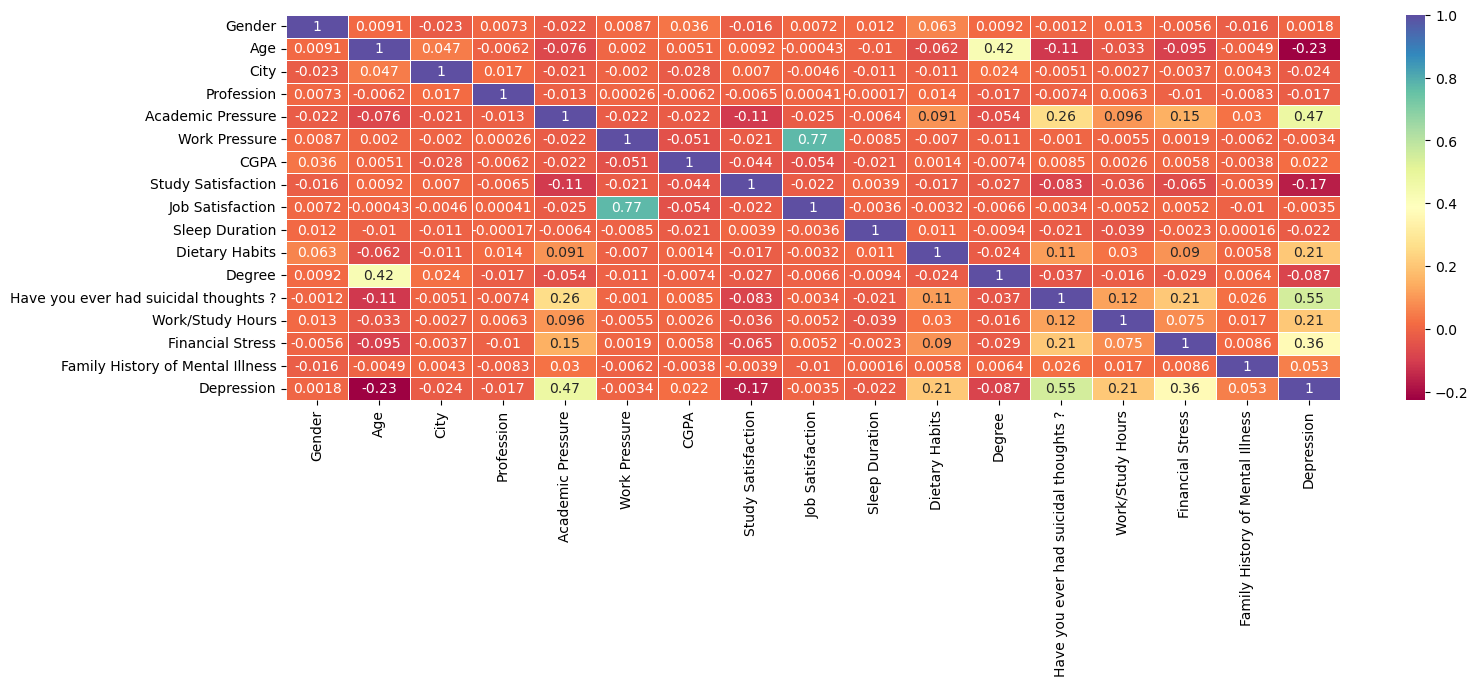

In [17]:
#copied_df.corr()
#immediately noticed that the 'Work Pressure' category was just NaN, so need to fix it (fix input back at top when categories were made)

copied_df.corr() 
plt.figure(figsize = (17, 5))
#copied_df = copied_df.drop(columns=["id"])
sns.heatmap(copied_df.corr(), annot = True, linewidth = 0.5, cmap = "Spectral")
plt.show()


Do not know too much more about what I should be doing so I will tentatively move on to part 2 (can always come back maybe??)

PART 2 

In [13]:
!pip install scikit-learn 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [18]:
#predictions 
Xinit=copied_df.drop(columns=['Age','Study Satisfaction','Degree','Depression']) #dropping these bc of their negative values on the heatmap(RED)
Yinit=copied_df['Depression']
model1 = DecisionTreeRegressor()
model1.fit(Xinit,Yinit)
Xinit.head()


,Gender,City,Profession,Academic Pressure,Work Pressure,CGPA,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1,51,12,5.0,0.0,8.97,0.0,0,0,1,3.0,0,0
1,0,5,12,2.0,0.0,5.90,0.0,0,1,0,3.0,1,1
2,1,44,12,3.0,0.0,7.03,0.0,2,0,0,9.0,0,1
3,0,49,12,3.0,0.0,5.59,0.0,1,1,1,4.0,4,1
4,0,18,12,4.0,0.0,8.13,0.0,0,1,1,1.0,0,0


In [19]:
copied_df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,51,12,5.0,0.0,8.97,2.0,0.0,0,0,4,1,3.0,0,0,1
1,0,24.0,5,12,2.0,0.0,5.90,5.0,0.0,0,1,11,0,3.0,1,1,0
2,1,31.0,44,12,3.0,0.0,7.03,5.0,0.0,2,0,6,0,9.0,0,1,0
3,0,28.0,49,12,3.0,0.0,5.59,2.0,0.0,1,1,8,1,4.0,4,1,1
4,0,25.0,18,12,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,0,0,0


In [21]:
predictionsInit = model1.predict(Xinit)
predictionsInit

array([1., 0., 0., ..., 0., 1., 1.])

In [ ]:
#model 1 ??

X1=copied_df['Academic Pressure']
Y1=copied_df['Depression']